In [3]:
#Imports
import os
import gzip
import _pickle as pickle

import numpy as np
import scipy.stats
import pymc3


import itertools
import skimage.transform

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Import ImaGene
%run -i /data/home/bt18241/research-project/ImaGene/ImaGene.py

# Reading first simulation

In [3]:
path = '/data/scratch/bt18241/Data/'

In [4]:
path_sim = '/data/scratch/bt18241/Binary/cr1_binary_tennessen_80kbp_200_neutral'

In [7]:
file_sim = ImaFile(simulations_folder=path_sim + '/Simulations1', nr_samples=202, model_name='Marth-2epoch-AA');

Populate an _ImaGene_ object by specifying the number of variables to estimate/predict (`selection_coeff_hetero`) and how many data points per class to retain. 

In [8]:
gene_sim = file_sim.read_simulations(parameter_name='selection_coeff_hetero', max_nrepl=2000);

Look at the data stored in the object

In [9]:
gene_sim.summary()

An object of 2000 image(s)
Rows: min 202, max 202, mean 202.000000, std 0.000000
Columns: min 383, max 624, mean 495.837000, std 36.147910


0

There are 2000 datapoints for the neutral class.

All the images have 202 rows, which represents the number of simulated haplotypes. 
The images have different number of columns, from ~383 to ~624, the average being ~495. The number of columns is the number of polymorphic sites and fixed derived alleles in the msms file. The number can change from a simulated gene to another.

The same data processing is used on the real dataset.

Check the sample allele frequency for the neutral allele.

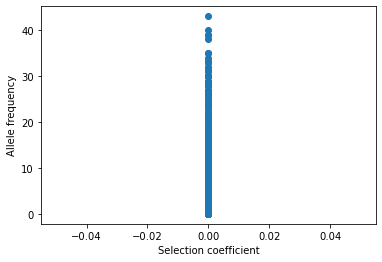

In [10]:
freqs = calculate_allele_frequency(gene_sim, 0.5);
plt.scatter(gene_sim.targets, freqs, marker='o');
plt.xlabel('Selection coefficient');
plt.ylabel('Allele frequency');

In [11]:
gene_sim.filter_freq(0.01);
gene_sim.sort('rows_freq');
gene_sim.summary();

An object of 2000 image(s)
Rows: min 202, max 202, mean 202.000000, std 0.000000
Columns: min 188, max 389, mean 290.943500, std 31.836101


Resize all images to have the same dimensions as the real data.

In [12]:
gene_sim.resize((226, 406));
gene_sim.summary();

An object of 2000 image(s)
Rows: min 226, max 226, mean 226.000000, std 0.000000
Columns: min 406, max 406, mean 406.000000, std 0.000000


After data manipulation, convert images to  numpy float matrices.
The colours of the pixels are also flipped so that black pixels represent derived alleles and white represent ancestral alleles.
This is achived through `.convert` which also normalises the data.

In [13]:
gene_sim.convert(flip=True);
gene_sim.summary();

An object of 2000 image(s)
Rows: min 226, max 226, mean 226.000000, std 0.000000
Columns: min 406, max 406, mean 406.000000, std 0.000000


As well as containing genomic data, an _ImaGene_ object also consists of information about the targets. For example, about the selection coefficient which is 0 for netural in $2N_e$ units with $N_e = 10000$.
Plot one random image of the neutral class.

0


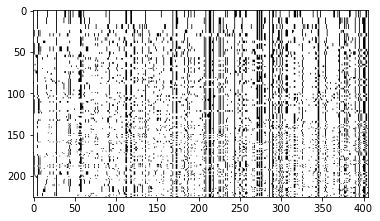

In [14]:
for sel in gene_sim.classes:
    print(sel)
    gene_sim.plot(np.where(gene_sim.targets == sel)[0][0])

Randomly shuffle image before using them to train network

In [15]:
gene_sim.subset(get_index_random(gene_sim));

Vectorise target as required by _keras_.

In [16]:
gene_sim.targets = to_binary(gene_sim.targets);

Save object

In [17]:
gene_sim.save(file=path + 'gene_sim_cr1_neu.binary')

0

Load _ImaGene_ object

In [18]:
gene_sim_neu = load_imagene(file=path + 'gene_sim_cr1_neu.binary')

## Read other simulations from each batch

In [19]:
file_sim_neu2 = ImaFile(simulations_folder=path_sim + '/Simulations2', nr_samples=202, model_name='Marth-2epoch-AA')
gene_sim_neu2 = file_sim_neu2.read_simulations(parameter_name='selection_coeff_hetero', max_nrepl=2000)

gene_sim_neu2.filter_freq(0.01)
gene_sim_neu2.sort('rows_freq')
gene_sim_neu2.resize((226, 406))
gene_sim_neu2.convert(flip=True)

gene_sim_neu2.subset(get_index_random(gene_sim_neu2))
gene_sim_neu2.targets = to_binary(gene_sim_neu2.targets)

gene_sim_neu2.save(file=path + 'gene_sim2_cr1_neu.binary')
gene_sim_neu2 = load_imagene(file=path + 'gene_sim2_cr1_neu.binary')

In [20]:
file_sim_neu3 = ImaFile(simulations_folder=path_sim + '/Simulations3', nr_samples=202, model_name='Marth-2epoch-AA')
gene_sim3 = file_sim_neu3.read_simulations(parameter_name='selection_coeff_hetero', max_nrepl=2000)

gene_sim3.filter_freq(0.01)
gene_sim3.sort('rows_freq')
gene_sim3.resize((226, 406))
gene_sim3.convert(flip=True)

gene_sim3.subset(get_index_random(gene_sim3))
gene_sim3.targets = to_binary(gene_sim3.targets)

gene_sim3.save(file=path + 'gene_sim3_cr1_neu.binary')
gene_sim3 = load_imagene(file=path + 'gene_sim3_cr1_neu.binary')

In [21]:
file_sim_neu4 = ImaFile(simulations_folder=path_sim + '/Simulations4', nr_samples=202, model_name='Marth-2epoch-AA')
gene_sim_neu4 = file_sim_neu4.read_simulations(parameter_name='selection_coeff_hetero', max_nrepl=2000)

gene_sim_neu4.filter_freq(0.01)
gene_sim_neu4.sort('rows_freq')
gene_sim_neu4.resize((226, 406))
gene_sim_neu4.convert(flip=True)

gene_sim_neu4.subset(get_index_random(gene_sim_neu4))
gene_sim_neu4.targets = to_binary(gene_sim_neu4.targets)

gene_sim_neu4.save(file=path + 'gene_sim4_cr1_neu.binary')
gene_sim_neu4 = load_imagene(file=path + 'gene_sim4_cr1_neu.binary')

In [22]:
file_sim_neu5 = ImaFile(simulations_folder=path_sim + '/Simulations5', nr_samples=202, model_name='Marth-2epoch-AA')
gene_sim_neu5 = file_sim_neu5.read_simulations(parameter_name='selection_coeff_hetero', max_nrepl=2000)

gene_sim_neu5.filter_freq(0.01)
gene_sim_neu5.sort('rows_freq')
gene_sim_neu5.resize((226, 406))
gene_sim_neu5.convert(flip=True)

gene_sim_neu5.subset(get_index_random(gene_sim_neu5))
gene_sim_neu5.targets = to_binary(gene_sim_neu5.targets)

gene_sim_neu5.save(file=path + 'gene_sim5_cr1_neu.binary')
gene_sim_neu5 = load_imagene(file=path + 'gene_sim5_cr1_neu.binary')

In [23]:
file_sim_neu6 = ImaFile(simulations_folder=path_sim + '/Simulations6', nr_samples=202, model_name='Marth-2epoch-AA')
gene_sim_neu6 = file_sim_neu6.read_simulations(parameter_name='selection_coeff_hetero', max_nrepl=2000)

gene_sim_neu6.filter_freq(0.01)
gene_sim_neu6.sort('rows_freq')
gene_sim_neu6.resize((226, 406))
gene_sim_neu6.convert(flip=True)

gene_sim_neu6.subset(get_index_random(gene_sim_neu6))
gene_sim_neu6.targets = to_binary(gene_sim_neu6.targets)

gene_sim_neu6.save(file=path + 'gene_sim6_cr1_neu.binary')
gene_sim_neu6 = load_imagene(file=path + 'gene_sim6_cr1_neu.binary')

In [24]:
file_sim_neu7 = ImaFile(simulations_folder=path_sim + '/Simulations7', nr_samples=202, model_name='Marth-2epoch-AA')
gene_sim_neu7 = file_sim_neu7.read_simulations(parameter_name='selection_coeff_hetero', max_nrepl=2000)

gene_sim_neu7.filter_freq(0.01)
gene_sim_neu7.sort('rows_freq')
gene_sim_neu7.resize((226, 406))
gene_sim_neu7.convert(flip=True)

gene_sim_neu7.subset(get_index_random(gene_sim_neu7))
gene_sim_neu7.targets = to_binary(gene_sim_neu7.targets)

gene_sim_neu7.save(file=path + 'gene_sim7_cr1_neu.binary')
gene_sim_neu7 = load_imagene(file=path + 'gene_sim7_cr1_neu.binary')

In [25]:
file_sim_neu8 = ImaFile(simulations_folder=path_sim + '/Simulations8', nr_samples=202, model_name='Marth-2epoch-AA')
gene_sim_neu8 = file_sim_neu8.read_simulations(parameter_name='selection_coeff_hetero', max_nrepl=2000)

gene_sim_neu8.filter_freq(0.01)
gene_sim_neu8.sort('rows_freq')
gene_sim_neu8.resize((226, 406))
gene_sim_neu8.convert(flip=True)

gene_sim_neu8.subset(get_index_random(gene_sim_neu8))
gene_sim_neu8.targets = to_binary(gene_sim_neu8.targets)

gene_sim_neu8.save(file=path + 'gene_sim8_cr1_neu.binary')
gene_sim_neu8 = load_imagene(file=path + 'gene_sim8_cr1_neu.binary')

In [26]:
file_sim_neu9 = ImaFile(simulations_folder=path_sim + '/Simulations9', nr_samples=202, model_name='Marth-2epoch-AA')
gene_sim_neu9 = file_sim_neu9.read_simulations(parameter_name='selection_coeff_hetero', max_nrepl=2000)

gene_sim_neu9.filter_freq(0.01)
gene_sim_neu9.sort('rows_freq')
gene_sim_neu9.resize((226, 406))
gene_sim_neu9.convert(flip=True)

gene_sim_neu9.subset(get_index_random(gene_sim_neu9))
gene_sim_neu9.targets = to_binary(gene_sim_neu9.targets)

gene_sim_neu9.save(file=path + 'gene_sim9_cr1_neu.binary')
gene_sim_neu9 = load_imagene(file=path + 'gene_sim9_cr1_neu.binary')

In [5]:
file_sim_neu10 = ImaFile(simulations_folder=path_sim + '/Simulations10', nr_samples=202, model_name='Marth-2epoch-AA')
gene_sim_neu10 = file_sim_neu10.read_simulations(parameter_name='selection_coeff_hetero', max_nrepl=2000)

gene_sim_neu10.filter_freq(0.01)
gene_sim_neu10.sort('rows_freq')
gene_sim_neu10.resize((226, 406))
gene_sim_neu10.convert(flip=True)

gene_sim_neu10.subset(get_index_random(gene_sim_neu10))
gene_sim_neu10.targets = to_binary(gene_sim_neu10.targets)

gene_sim_neu10.save(file=path + 'gene_sim10_cr1_neu.binary')
gene_sim_neu10 = load_imagene(file=path + 'gene_sim10_cr1_neu.binary')

In [4]:
#load ImaGene object for each simulation
gene_sim_neu = load_imagene(file=path + 'gene_sim_cr1_neu.binary')
gene_sim_neu2 = load_imagene(file=path + 'gene_sim2_cr1_neu.binary')
gene_sim_neu3 = load_imagene(file=path + 'gene_sim3_cr1_neu.binary')
gene_sim_neu4 = load_imagene(file=path + 'gene_sim4_cr1_neu.binary')
gene_sim_neu5 = load_imagene(file=path + 'gene_sim5_cr1_neu.binary')
gene_sim_neu6 = load_imagene(file=path + 'gene_sim6_cr1_neu.binary')
gene_sim_neu7 = load_imagene(file=path + 'gene_sim7_cr1_neu.binary')
gene_sim_neu8 = load_imagene(file=path + 'gene_sim8_cr1_neu.binary')
gene_sim_neu9 = load_imagene(file=path + 'gene_sim9_cr1_neu.binary')
gene_sim_neu10 = load_imagene(file=path + 'gene_sim10_cr1_neu.binary')

# Obtaining haplotypes for each simulation

In [5]:
genotype_neu = np.array(gene_sim_neu.data, dtype=int)
croms_neu = np.squeeze(genotype_neu)

print(croms_neu.shape)


(2000, 226, 406)


In [6]:
genotype_neu2 = np.array(gene_sim_neu2.data, dtype=int)
croms_neu2 = np.squeeze(genotype_neu2)

In [7]:
genotype_neu3 = np.array(gene_sim_neu3.data, dtype=int)
croms_neu3 = np.squeeze(genotype_neu3)

In [8]:
genotype_neu4 = np.array(gene_sim_neu4.data, dtype=int)
croms_neu4 = np.squeeze(genotype_neu4)

In [9]:
genotype_neu5 = np.array(gene_sim_neu5.data, dtype=int)
croms_neu5 = np.squeeze(genotype_neu5)

In [10]:
genotype_neu6 = np.array(gene_sim_neu6.data, dtype=int)
croms_neu6 = np.squeeze(genotype_neu6)

In [11]:
genotype_neu7 = np.array(gene_sim_neu7.data, dtype=int)
croms_neu7 = np.squeeze(genotype_neu7)

In [12]:
genotype_neu8 = np.array(gene_sim_neu8.data, dtype=int)
croms_neu8 = np.squeeze(genotype_neu8)

In [13]:
genotype_neu9 = np.array(gene_sim_neu9.data, dtype=int)
croms_neu9 = np.squeeze(genotype_neu9)

In [14]:
genotype_neu10 = np.array(gene_sim_neu10.data, dtype=int)
croms_neu10 = np.squeeze(genotype_neu10)

# Calculating Summary Statistics

Import stats.py to calculate summary statistics

In [17]:
%run -i /data/home/bt18241/research-project/ImaGene/first_simulation/stats.py

Calculate summary statistics on each halplotype and convert the results into a CSV file

In [19]:
sum_stats(croms_neu, csv_path="/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms.csv")
sum_stats(croms_neu2, csv_path="/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms2.csv")
sum_stats(croms_neu3, csv_path="/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms3.csv")
sum_stats(croms_neu4, csv_path="/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms4.csv")
sum_stats(croms_neu5, csv_path="/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms5.csv")
sum_stats(croms_neu6, csv_path="/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms6.csv")
sum_stats(croms_neu7, csv_path="/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms7.csv")
sum_stats(croms_neu8, csv_path="/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms8.csv")
sum_stats(croms_neu9, csv_path="/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms9.csv")
sum_stats(croms_neu10,csv_path="/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms10.csv")



In [20]:
#combine csv files
#add class column including selection or neutral



Read the CSV files into dataframes

In [21]:
crom_neu_csv = pd.read_csv('/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms.csv')
crom_neu2_csv = pd.read_csv('/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms2.csv')
crom_neu3_csv = pd.read_csv('/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms3.csv')
crom_neu4_csv = pd.read_csv('/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms4.csv')
crom_neu5_csv = pd.read_csv('/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms5.csv')
crom_neu6_csv = pd.read_csv('/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms6.csv')
crom_neu7_csv = pd.read_csv('/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms7.csv')
crom_neu8_csv = pd.read_csv('/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms8.csv')
crom_neu9_csv = pd.read_csv('/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms9.csv')
crom_neu10_csv = pd.read_csv('/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_tenessen_80kbp_800_neutral_croms10.csv')




Adding the statistics headings to each df

In [22]:
crom_neu_csv.columns = ['Mean(MeanPwiseDist)','Tajimas D', 
            'H1','H12','H123', 'H2/H1', 'Haplotype Diversity', 'Mean(EHH)', 'Median(nsl)']
crom_neu2_csv.columns = ['Mean(MeanPwiseDist)','Tajimas D', 
            'H1','H12','H123', 'H2/H1', 'Haplotype Diversity', 'Mean(EHH)', 'Median(nsl)']
crom_neu3_csv.columns = ['Mean(MeanPwiseDist)','Tajimas D', 
            'H1','H12','H123', 'H2/H1', 'Haplotype Diversity', 'Mean(EHH)', 'Median(nsl)']
crom_neu4_csv.columns = ['Mean(MeanPwiseDist)','Tajimas D', 
            'H1','H12','H123', 'H2/H1', 'Haplotype Diversity', 'Mean(EHH)', 'Median(nsl)']
crom_neu5_csv.columns = ['Mean(MeanPwiseDist)','Tajimas D', 
            'H1','H12','H123', 'H2/H1', 'Haplotype Diversity', 'Mean(EHH)', 'Median(nsl)']
crom_neu6_csv.columns = ['Mean(MeanPwiseDist)','Tajimas D', 
            'H1','H12','H123', 'H2/H1', 'Haplotype Diversity', 'Mean(EHH)', 'Median(nsl)']
crom_neu7_csv.columns = ['Mean(MeanPwiseDist)','Tajimas D', 
            'H1','H12','H123', 'H2/H1', 'Haplotype Diversity', 'Mean(EHH)', 'Median(nsl)']
crom_neu8_csv.columns = ['Mean(MeanPwiseDist)','Tajimas D', 
            'H1','H12','H123', 'H2/H1', 'Haplotype Diversity', 'Mean(EHH)', 'Median(nsl)']
crom_neu9_csv.columns = ['Mean(MeanPwiseDist)','Tajimas D', 
            'H1','H12','H123', 'H2/H1', 'Haplotype Diversity', 'Mean(EHH)', 'Median(nsl)']
crom_neu10_csv.columns = ['Mean(MeanPwiseDist)','Tajimas D', 
            'H1','H12','H123', 'H2/H1', 'Haplotype Diversity', 'Mean(EHH)', 'Median(nsl)']


Combines all the neutral dataframes containing the statistics results from each simulation and merges it into one CSV file. This CSV file will then be used to produce a boxplot to compare the difference between the neutral and selection class.


In [23]:
#Combines neutral dataframes
croms_merged_neu = pd.concat([crom_neu_csv, crom_neu2_csv, crom_neu3_csv, crom_neu4_csv, crom_neu5_csv, crom_neu6_csv, 
                              crom_neu7_csv, crom_neu8_csv, crom_neu9_csv,crom_neu10_csv])

# Write it to a new CSV file
croms_merged_neu.to_csv("/data/home/bt18241/research-project/ImaGene/first_simulation/cr1/cr1_croms_merged_neu.csv", index=False)